In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
file = "train.csv"
data = pd.read_csv(file)
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


## This dataset has 550068 rows and 12 columns.

In [3]:
data.shape

(550068, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Checking for missing values in the dataset.

In [5]:
null = pd.DataFrame({'Null Values' : data.isna().sum().sort_values(ascending=False),
                     '% of Null Values' : (data.isna().sum().sort_values(ascending=False)) / (data.shape[0]) * (100)})
null[null['Null Values'] > 0]

,Null Values,% of Null Values
Product_Category_3,383247,69.672659
Product_Category_2,173638,31.566643


## Checking the statical summary of our data.

### Numerical Features

In [6]:
num_features=[col for col in data.columns if data[col].dtype!='O']
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


### Categorical Features

In [7]:
cat_features=[col for col in data.columns if data[col].dtype=='O']
data[cat_features].describe()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


#### Observations

* The company offers a total of 3,631 distinct products.
* The majority of customers are male.
* The predominant age range among customers falls between 26 and 35 years old.
* There are 3 city categories, with category B having the highest representation among customers.
* A significant portion of the company's customers are newcomers to the city.

## Unique Values in The Features

In [8]:
data.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

### Observations

In the dataset, there are a total of 5891 different customers and 3631 different products. The age groups are categorized into 7 bands, and there are 21 different occupations represented. Additionally, the dataset includes customers from 3 different cities.

In [9]:
data.rename(columns={'City_Category':'City', 'Stay_In_Current_City_Years': 'City_year'}, inplace=True)
uni = ['Age', 'City', 'City_year', 'Marital_Status']

print('')
for col in uni:
    print(f'{col.upper()} : {sorted(data[col].unique())}')
    print('\n')

    if col == 'Age':
        sorted_age_values = sorted(data[col].unique(), key=lambda x: int(x.split('-')[0]) if '-' in x else int(x[:-1]))
        for age_range in sorted_age_values:
            count = data[col].value_counts()[age_range]
            print(f'{age_range:5} : {count}')
    else:
        sorted_values = sorted(data[col].unique())
        for value in sorted_values:
            count = data[col].value_counts()[value]
            print(f'{value:5} : {count}')
    print('\n')


AGE : ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']


0-17  : 15102
18-25 : 99660
26-35 : 219587
36-45 : 110013
46-50 : 45701
51-55 : 38501
55+   : 21504


CITY : ['A', 'B', 'C']


A     : 147720
B     : 231173
C     : 171175


CITY_YEAR : ['0', '1', '2', '3', '4+']


0     : 74398
1     : 193821
2     : 101838
3     : 95285
4+    : 84726


MARITAL_STATUS : [0, 1]


    0 : 324731
    1 : 225337




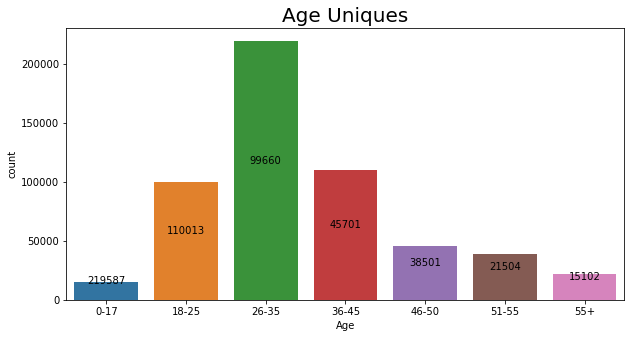

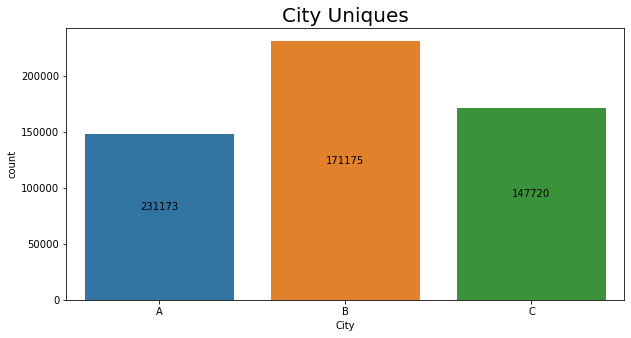

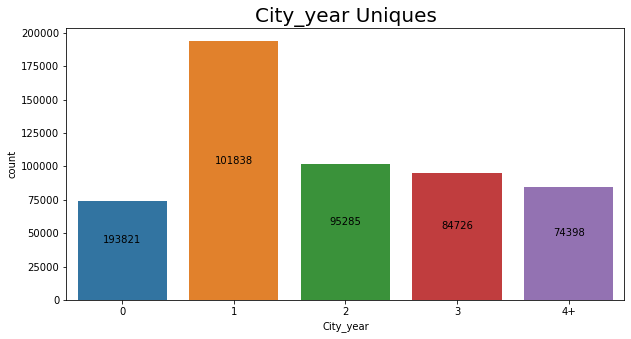

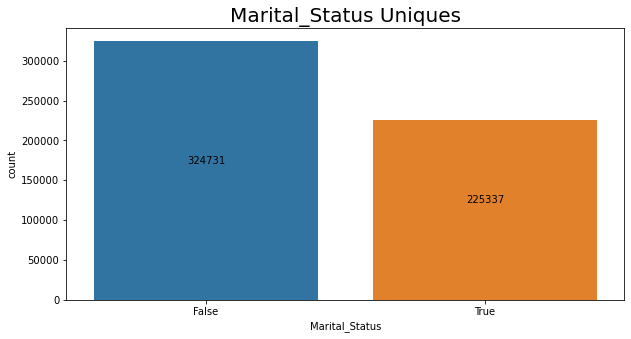

In [10]:
data.Marital_Status = data.Marital_Status.astype('bool')
for col in uni:
    plt.figure(figsize=(10, 5))
    order = sorted(data[col].unique()) if col != 'Age' else sorted(data[col].unique()
            , key=lambda x: int(x.split('-')[0]) if '-' in x else int(x[:-1]))
    ax = sns.countplot(data[col], order=order)
    plt.title(f'{col} Uniques', fontsize=20)
    for p, label in zip(ax.patches, data[col].value_counts()):
        ax.annotate(f'{label}', (p.get_x() + p.get_width() / 2., p.get_height()/2)
                    , ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    plt.show()

## City feature

In [11]:
normalized_city_counts = data['City'].value_counts(normalize=True).sort_index()
normalized_city_counts

A    0.268549
B    0.420263
C    0.311189
Name: City, dtype: float64

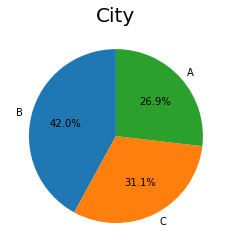

In [12]:
city_counts = data['City'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('City', fontsize=20)
plt.show()

## Consuming by gender.

In [13]:
gender_purchase_counts = data[['Gender', 'Purchase']].groupby('Gender')['Purchase'].sum().to_frame().rename(columns={'Purchase':'Counts'}).reset_index()\
.sort_values(by='Counts', ascending=False)
gender_purchase_counts

,Gender,Counts
1,M,3909580100
0,F,1186232642


In [14]:
gender_purchase_mean = data[['Gender', 'Purchase']].groupby('Gender').mean().sort_values(by='Purchase', ascending=False)
gender_purchase_mean

,Purchase
Gender,
M,9437.526040
F,8734.565765


In [15]:
marital_status_analysis = data.groupby(['Gender', 'Marital_Status'])['Marital_Status', 'Purchase'].agg({'Marital_Status':'count', 'Purchase':'mean'})\
.rename({'Marital_Status':'MCounts','Purchase':'PMean'}, axis=1).reset_index()
marital_status_analysis

,Gender,Marital_Status,MCounts,PMean
0,F,False,78821,8679.845815
1,F,True,56988,8810.249789
2,M,False,245910,9453.756740
3,M,True,168349,9413.817605


In [16]:
marital_status_counts = data.groupby('Gender')['Marital_Status'].value_counts().to_frame().rename({'Marital_Status':'Count'}, axis=1).reset_index()
marital_status_counts

,Gender,Marital_Status,Count
0,F,False,78821
1,F,True,56988
2,M,False,245910
3,M,True,168349


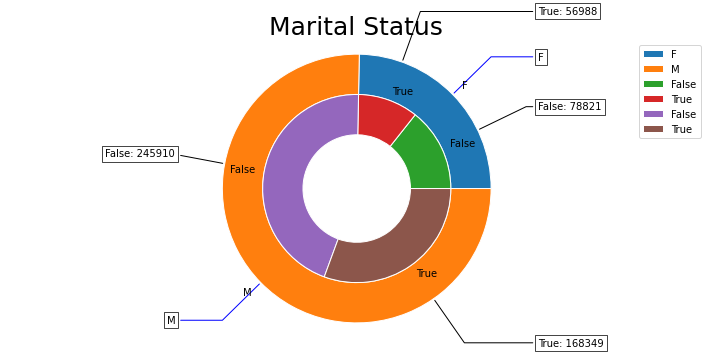

In [18]:
labels1 = marital_status_counts['Gender'].unique()
size1 = marital_status_counts.groupby('Gender').sum().Count
labels2 = marital_status_counts.Marital_Status
size2 = marital_status_counts.Count

fig, ax = plt.subplots(figsize=(10, 5))
sizee = 0.3

# Pie chart for Gender
wedges, texts = ax.pie(size1, labels=labels1, radius=1, wedgeprops=dict(width=sizee, edgecolor='w'))

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle}, color='b')
    ax.annotate(labels1[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

# Pie chart for Marital Status
wedges2, texts2 = ax.pie(size2, labels=labels2, radius=1-sizee, wedgeprops=dict(width=sizee, edgecolor='w'))

for i, p in enumerate(wedges2):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle}, color='k')
    ax.annotate(f'{labels2[i]}: {round(size2[i], 2)}', xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

plt.title('Marital Status', fontsize=25)
plt.axis('equal')
plt.tight_layout()
plt.legend()  # This will use labels specified in the ax.pie calls
plt.show()